In [6]:
from sklearn.linear_model import LinearRegression #imports libaries and functions 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("insurance.csv") #loads data using pandaas
df #displays the first 5 and last 5 observations


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.groupby(['age'])["charges"].mean()

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

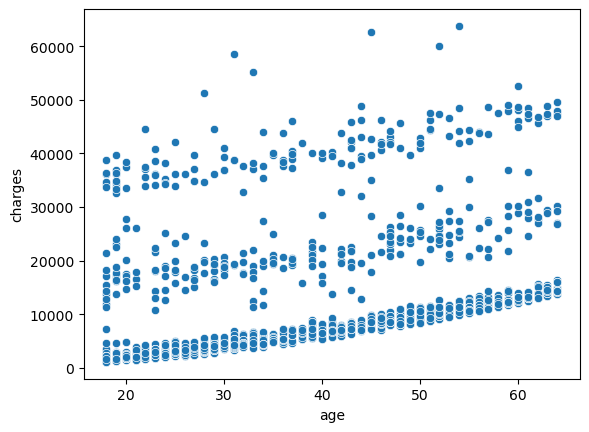

In [9]:
sns.scatterplot(data = df, x= 'age', y='charges') #displays scatterplot to see patterns in data
plt.show()
plt.close()


<Axes: xlabel='age', ylabel='charges'>

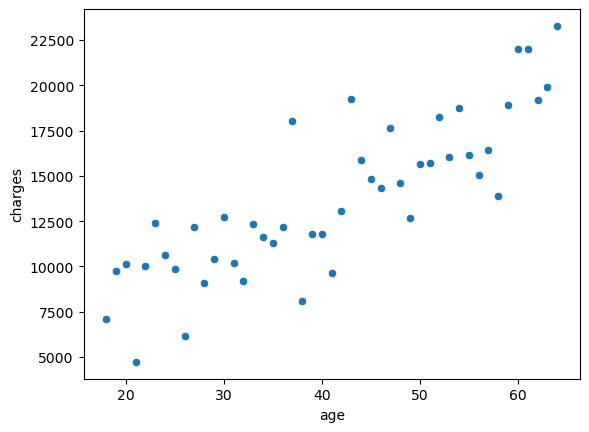

In [17]:
average_df= df.groupby("age")["charges"].mean().reset_index() #creates new data dataframe of averages of charges per age
sns.scatterplot(data=average_df, x= 'age', y= 'charges') #dsiplays scatterplot of data to see patterns


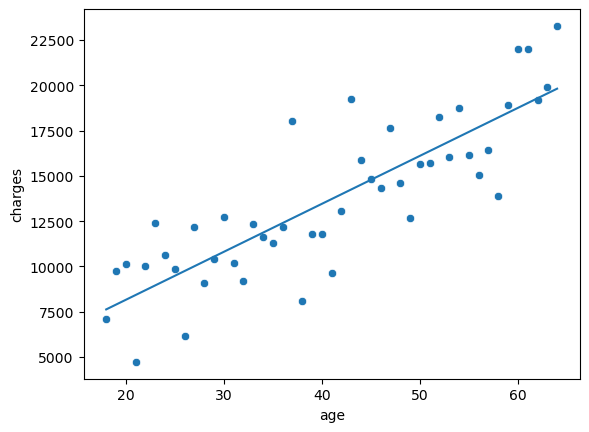

In [45]:
charges_model = LinearRegression() #create model


X = average_df[['age']].values.reshape(-1,1) #determines independent and dependent variables
y = average_df['charges'].values

charges_model.fit(X,y) #fit model and plot data
y_predict = charges_model.predict(X) 

plt.figure() 
sns.scatterplot(data=average_df, x='age', y='charges')
plt.plot(X, y_predict)
plt.show()
plt.close()

In [49]:
unknown_x = [[30]] #predicts y value using model
x_predict = np.append(X, unknown_x).reshape(-1,1)
y_predict = charges_model.predict(x_predict)

print(f"The person aged {unknown_x} will be charged {charges_model.predict(unknown_x)} for insurance")


The person aged [[30]] will be charged [10807.39684957] for insurance


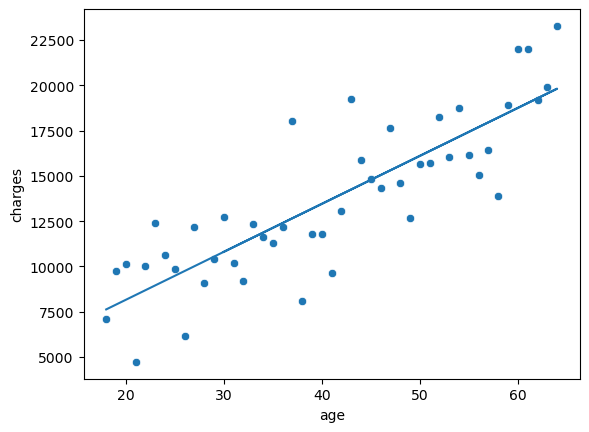

In [48]:
sns.scatterplot(data=average_df, x='age', y='charges') #plots line of best fit 
plt.plot(x_predict, y_predict)
plt.show()
plt.close()